In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_06.shp', encoding='latin-1')
gdf

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,...,build_ager,build_foot,gfa,levels_pro,gm_name,gm_phase,postcode,gm_award,gm_link,geometry
0,1337396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,1362701,NaN,NaN,NaN,NaN,NaN,parking,NaN,garage,3,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,None
2,1407265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,1447583,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,12,...,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,None
4,1447589,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,12,...,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113425,1165422507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
113426,1165422508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
113427,1165450372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,...,1925-1949,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,None
113428,1165450373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,...,1925-1949,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,None


In [76]:
df = pd.read_csv(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_HDB.csv', index_col=None)
df

,osmid,building_l,build_foot,hdb_street,hdb_max_floor_lvl,hdb_year_completed,hdb_residential,hdb_commercial,hdb_total_dwelling_units,hdb_1room_sold,hdb_2room_sold,hdb_3room_sold,hdb_4room_sold,hdb_5room_sold,hdb_exec_sold,hdb_multigen_sold,hdb_studio_apartment_sold
0,172927954,16.0,8.192955e-08,BEACH RD,16,1970,Y,Y,142,0,1,138,1,2,0,0,0
1,116692213,14.0,1.200548e-07,BEDOK STH AVE 1,14,1975,Y,N,206,0,0,204,0,2,0,0,0
2,97585683,50.0,6.600365e-08,CANTONMENT RD,2,2010,N,Y,0,0,0,0,0,0,0,0,0
3,229628310,10.0,1.204793e-07,CHAI CHEE RD,15,1982,Y,N,102,0,0,0,10,92,0,0,0
4,42064045,4.0,1.727847e-07,CHANGI VILLAGE RD,4,1975,Y,Y,55,0,0,54,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,97552198,12.0,7.807203e-08,JURONG WEST ST 74,12,1994,Y,N,70,0,0,0,48,22,0,0,0
11113,453516940,16.0,7.387091e-08,PASIR RIS ST 71,16,1994,Y,N,74,0,0,0,37,37,0,0,0
11114,154252544,NaN,1.538326e-07,WOODLANDS AVE 6,12,1996,Y,N,115,0,0,0,71,44,0,0,0
11115,172129253,NaN,1.166109e-07,YISHUN ST 72,12,1985,Y,N,110,0,0,0,48,62,0,0,0


In [77]:
df['osmid'].nunique()

10601

In [78]:
megdf = gdf.merge(df, on='osmid', how='left')
megdf.head(3)

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,...,hdb_commercial,hdb_total_dwelling_units,hdb_1room_sold,hdb_2room_sold,hdb_3room_sold,hdb_4room_sold,hdb_5room_sold,hdb_exec_sold,hdb_multigen_sold,hdb_studio_apartment_sold
0,1337396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362701,NaN,NaN,NaN,NaN,NaN,parking,NaN,garage,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1407265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
megdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113946 entries, 0 to 113945
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   osmid                      113946 non-null  int64   
 1   mp_prog                    112190 non-null  object  
 2   far                        45441 non-null   float64 
 3   osmlanduse                 85980 non-null   object  
 4   mp_plotare                 112405 non-null  float64 
 5   heritage_n                 7775 non-null    object  
 6   amenity                    3234 non-null    object  
 7   name                       11378 non-null   object  
 8   levels                     28775 non-null   object  
 9   age                        13982 non-null   float64 
 10  build_prog                 111667 non-null  object  
 11  build_foot_x               112405 non-null  float64 
 12  gfa                        53798 non-null   float64 
 13  levels

In [87]:
megdf['build_foot_y'].unique()

array([           nan, 1.46772005e-07, 1.48629590e-07, ...,
       2.21891900e-07, 2.33776300e-08, 2.64131900e-08])

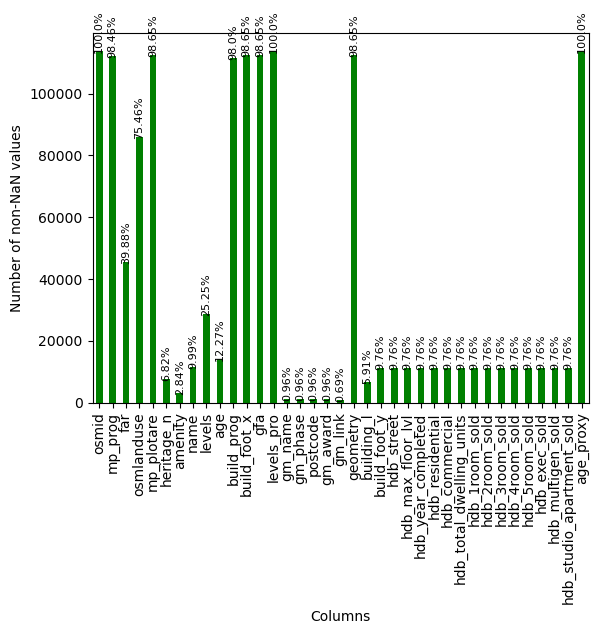

In [112]:
# get the count of non-NaN values for each column
gdfy = megdf
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='green')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [90]:
megdf = megdf.drop(columns=['building','height','build_ager'])

In [82]:
#enrich age by HDB
mask = (megdf['age'].isna()) & (megdf['hdb_year_completed'].notnull())
megdf.loc[mask, 'age'] = megdf['hdb_year_completed']

In [83]:
#enrich levels by HDB
mask = (megdf['levels'].isna()) & (megdf['hdb_max_floor_lvl'].notnull())
megdf.loc[mask, 'levels'] = megdf['hdb_max_floor_lvl']

In [88]:
#enrich function by HDB
mask = (megdf['build_prog'].isna()) & (megdf['hdb_max_floor_lvl'].notnull())
megdf.loc[mask, 'build_prog'] = 'RESIDENTIAL'

In [85]:
megdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_06.shp', crs='EPSG:4326')

C:\Users\rromu\AppData\Local\Temp\ipykernel_13960\353004135.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  megdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_06.shp', crs='EPSG:4326')


In [106]:
megdf['build_foot_x'].unique()

array([   nan,  3063.,  5117., ...,  6919.,  3742., 12819.])

In [93]:
import random
#new age_proxy
#copy age
#if heritage age = random 1900 - 1960
#if program:
    #glass_box = random 2000 - 2020, deco_box = random 1990 - 2020,
    #others = random 1961 - 2020
megdf['age_proxy'] = megdf['age']
mask = megdf['age_proxy'].isna() & megdf['heritage_n'].notnull()
megdf.loc[mask, 'age_proxy'] = random.choices(range(1900, 1960+1), k=len(megdf.loc[mask]))

mask1 = megdf['age_proxy'].isna() & (megdf['build_prog'] == 'glass_box')
mask2 = megdf['age_proxy'].isna() & (megdf['build_prog'] == 'deco_box')
mask3 = megdf['age_proxy'].isna()

megdf.loc[mask1, 'age_proxy'] = random.choices(range(2000, 2020+1), k=len(megdf.loc[mask1]))
megdf.loc[mask2, 'age_proxy'] = random.choices(range(1990, 2010+1), k=len(megdf.loc[mask2]))
megdf.loc[mask3, 'age_proxy'] = random.choices(range(1961, 2020+1), k=len(megdf.loc[mask3]))

In [102]:
#add proxy levels from program type
funlist = megdf['build_prog'].unique()
mask4 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[0])
mask5 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[2])
mask6 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[3])
mask7 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[4])
mask8 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[5])
mask9 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[6])
mask10 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[7])
mask11 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[8])
mask12 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[9])
mask13 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[11])
mask14 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[12])
mask15 = megdf['levels_pro'].isna() & (megdf['build_prog'] == funlist[13])
mask16 = megdf['levels_pro'].isna()

megdf.loc[mask4, 'levels_pro'] = random.choices(range(1, 3+1), k=len(megdf.loc[mask4]))
megdf.loc[mask5, 'levels_pro'] = random.choices(range(2, 4+1), k=len(megdf.loc[mask5]))
megdf.loc[mask6, 'levels_pro'] = random.choices(range(9, 30+1), k=len(megdf.loc[mask6]))
megdf.loc[mask7, 'levels_pro'] = random.choices(range(3, 5+1), k=len(megdf.loc[mask7]))
megdf.loc[mask8, 'levels_pro'] = random.choices(range(2, 8+1), k=len(megdf.loc[mask8]))
megdf.loc[mask9, 'levels_pro'] = random.choices(range(1, 3+1), k=len(megdf.loc[mask9]))
megdf.loc[mask10, 'levels_pro'] = random.choices(range(2, 4+1), k=len(megdf.loc[mask10]))
megdf.loc[mask11, 'levels_pro'] = random.choices(range(9, 50+1), k=len(megdf.loc[mask11]))
megdf.loc[mask12, 'levels_pro'] = random.choices(range(2, 8+1), k=len(megdf.loc[mask12]))
megdf.loc[mask13, 'levels_pro'] = random.choices(range(2, 5+1), k=len(megdf.loc[mask13]))                                                
megdf.loc[mask14, 'levels_pro'] = random.choices(range(2, 4+1), k=len(megdf.loc[mask14]))  
megdf.loc[mask15, 'levels_pro'] = random.choices(range(2, 5+1), k=len(megdf.loc[mask15]))                                                  
megdf.loc[mask16, 'levels_pro'] = random.choices(range(1, 6+1), k=len(megdf.loc[mask16]))                                                

In [109]:
megdf['levels_pro'] = megdf['levels_pro'].astype(int)

In [111]:
#add proxy gfa from levels and footprint
mask17 = megdf['gfa'].isna() & (megdf['levels_pro'].notnull()) & (megdf['build_foot_x'].notnull())
megdf.loc[mask17, 'gfa'] = megdf.loc[mask17, 'levels_pro'] * megdf.loc[mask17, 'build_foot_x']

In [113]:
megdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_07_proxy.shp', crs='EPSG:4326')

C:\Users\rromu\AppData\Local\Temp\ipykernel_13960\3179689178.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  megdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_07_proxy.shp', crs='EPSG:4326')
